# `thairath-228k` Dataset


This notebook performs a preliminary exploration of the `thairath-228k` dataset which was scraped from the news site [Thairath](thairath.co.th "thairath.co.th").
After filtering, it contains 228,937 articles with 388,383 tags from October 1, 2014 to October 21, 2019. This dataset was crawled and cleaned by [@nakhunchumpolsathien](https://github.com/nakhunchumpolsathien) and [@CaramelWaffle](https://github.com/caramelWaffle).

We selected the following tags with substantial volume that resemble **classifying types of articles**:
- `ข่าวทั่วไป` - General News
- `ข่าวกีฬา` - Sport News
- `ข่าวทั่วไทย` - Local News
- `ข่าวการเมือง` - Political News
- `ข่าวสังคม` - Society News
- `ข่าวเศรษฐกิจ` - Economic News
- `ข่าวบันเทิง` -  Entertainment News
- `ข่าวโซเชียล` - Socialnetwork News
- `เลือกตั้ง` - Election 
- `ข่าวต่างประเทศ` - International News
- `ข่าวไลฟ์สไตล์` - Lifestyle News
- `การศึกษา` - Education

This is a **multi-label classification task** and we use **F1-score** for each label as the benchmark. The benchmark include both **title classification** and **body classification**.

In [42]:
import pandas as pd
import numpy as np
from pythainlp import word_tokenize
from ast import literal_eval
from tqdm import tqdm_notebook
from collections import Counter

#viz
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# #snippet to install thai font in matplotlib from https://gist.github.com/korakot/9d7f5db632351dc92607fdec72a4953f
import matplotlib

# !wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !cp thsarabunnew-webfont.ttf /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
# !cp thsarabunnew-webfont.ttf /usr/share/fonts/truetype/

matplotlib.font_manager._rebuild()
matplotlib.rc('font', family='TH Sarabun New')

In [4]:
thairath = pd.read_csv('data/thairath-228k.csv')
print(thairath.shape)
thairath.head()

(228937, 4)


,title,body,summary,tags
0,ส่ง หลวงพ่ออลงกต วัดพระบาทน้ำพุ ถึงมือหมอแล้ว ...,ผู้สื่อข่าวรายงานว่า เมื่อเวลา 19.30 น. วันที่...,หลวงพ่ออลงกต วัดพระบาทน้ำพุ ประสบอุบัติเหตุขณะ...,"['หลวงพ่ออลงกต', 'วัดพระบาทน้ำพุ', 'หลวงพ่ออลง..."
1,สุดสลด ฝนถล่ม 2 รัฐอินเดีย น้ำท่วมใหญ่ดับกว่า ...,รายงานเมื่อ 30 ก.ย. 2562 ว่า เกิดเหตุน้ำท่วมฉั...,เกิดฝนตกหนักจนทำให้เกิดน้ำท่วมฉับพลันใน 2 รัฐข...,"['น้ำท่วม', 'อินเดีย', 'ฝนตกหนัก', 'รัฐอุตตรปร..."
2,โทมัส คุก ทำผวา,ที่สั่นคลอนกันมากขึ้นไปอีก นั่นคือ บริษัท โทมั...,บรรดาเจ้าของธุรกิจโรงแรมไทยที่มีสัญญารับลูกค้า...,"['โทมัส คุก', 'ล้มละลาย', 'บริษัททัวร์', 'อังก..."
3,ผีแดง พลาดเอง โดนปืนใหญ่ไล่เจ๊า 1-1 ศึกพรีเมีย...,เปิดฉากครึ่งแรก นาทีที่ 8 แมนฯยู ได้ทักทายก่อน...,การแข่งขันฟุตบอลพรีเมียร์ลีก อังกฤษ ฤดูกาล 201...,"['แมนเชสเตอร์ ยูไนเต็ด', 'อาร์เซนอล', 'พรีเมีย..."
4,รอวันฟ้าสว่าง,ฝากสารถึง พล.อ.ประยุทธ์ จันทร์โอชา นายกรัฐมนตร...,มีเสียงสะท้อนความอึดอัดของตำรวจกลุ่มหนึ่ง,"['ส่องตำรวจ', 'สหบาท', 'ประยุทธ์ จันทร์โอชา', ..."


## Labels

### Tag Distribution

In [5]:
all_labels = []
for i in tqdm_notebook(range(thairath.shape[0])):
    all_labels+=literal_eval(thairath.tags[i])

In [6]:
label_df = pd.DataFrame.from_dict(dict(Counter(all_labels)),orient='index').reset_index()
label_df.columns = ['label','cnt']
label_df.sort_values('cnt',ascending=False,inplace=True)
print(label_df.shape)
label_df.head(15)

(388383, 2)


,label,cnt
5,ข่าวทั่วไป,58401
4096,ไทยรัฐออนไลน์,51228
4098,ข่าว,49961
4134,ข่าวกีฬา,15557
4293,ไทยรัฐ,14812
4587,ข่าวทั่วไทย,14728
20,พรีเมียร์ลีก,9787
28808,หนังสือพิมพ์ไทยรัฐ,8099
4153,คอลัมน์ฉบับพิมพ์,7777
56525,คอลัมน์ไทยรัฐ,6662


In [7]:
label_df.tail(10)

,label,cnt
195098,เริ่มโจมตีครั้งแรก,1
195100,พบโครงกระดูกในพระราชวังจันทน์,1
195101,ขุดค้นพระราชวังจันทน์,1
195102,แบดมินตัน ไชนา โอเพ่น 2016,1
195106,สนับสนุนรถกระเช้า,1
195107,ฉีดพ้นยา,1
195108,นาข้าวเสีย,1
195110,กรรมการองค์กรอิสระ,1
195112,เบสท์,1
388382,สมใจ พึ่งถนอม,1


### Benchmark Labels

Out of over 300,000 tags, we selected 12 tags as our **benchmark labels**.

In [9]:
benchmark_labels = ['ข่าวทั่วไป','ข่าวกีฬา','ข่าวการเมือง','ข่าวสังคม','ข่าวเศรษฐกิจ','ข่าวโซเชียล',
                    'ข่าวบันเทิง','ข่าวต่างประเทศ','ข่าวทั่วไทย','เลือกตั้ง','ข่าวไลฟ์สไตล์','การศึกษา']

def in_benchmark(x,label):
    res = 1 if label in literal_eval(x) else 0
    return(res)

In [10]:
for label in tqdm_notebook(benchmark_labels):
    if label == 'ไทยรัฐออนไลน์' or label == "ข่าว" or label == "ไทยรัฐ": continue
    thairath[label] = thairath.tags.map(lambda x: in_benchmark(x,label))

### Number of Labels Per Sample

In [11]:
corr_df = thairath.iloc[:,4:]
label_cnt = corr_df.sum(axis=1)
label_cnt_df = pd.DataFrame.from_dict(dict(Counter(label_cnt)), orient='index').reset_index()
label_cnt_df.columns = ['nb_label','cnt']
label_cnt_df = label_cnt_df.sort_values('cnt',ascending=False)
label_cnt_df['per'] = label_cnt_df.cnt / label_cnt_df.cnt.sum()

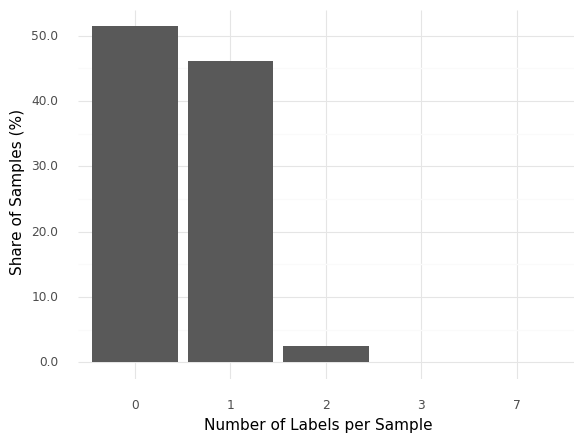

<ggplot: (296161017)>


,nb_label,cnt,per
1,0,117692,0.514080
0,1,105491,0.460786
2,2,5675,0.024788
3,3,78,0.000341
4,7,1,0.000004


In [12]:
g = (ggplot(label_cnt_df,aes(x='factor(nb_label)', y='per')) + geom_bar(stat='identity') + theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    xlab('Number of Labels per Sample') + ylab('Share of Samples (%)'))
print(g)
label_cnt_df

### Benchmark Label Distribution

In [13]:
label_df

,label,cnt
5,ข่าวทั่วไป,58401
4096,ไทยรัฐออนไลน์,51228
4098,ข่าว,49961
4134,ข่าวกีฬา,15557
4293,ไทยรัฐ,14812
...,...,...
195107,ฉีดพ้นยา,1
195108,นาข้าวเสีย,1
195110,กรรมการองค์กรอิสระ,1
195112,เบสท์,1


In [16]:
label_df = corr_df.sum(axis=0).reset_index()
label_df.columns = ['label','cnt']
label_df['per'] = label_df.cnt / label_df.cnt.sum()
label_df.sort_values('per',ascending=False,inplace=True)
label_df['en_label'] =['00 - General News','01 - Sport News','02 - Local News','03 - Political News','04 - Society News',
                       '05 - Economic News','06 - Entertainment News','07 - Socialnetwork News',
                       '08 - Election','09 - International News','10 - Lifestyle News','11 - Education']

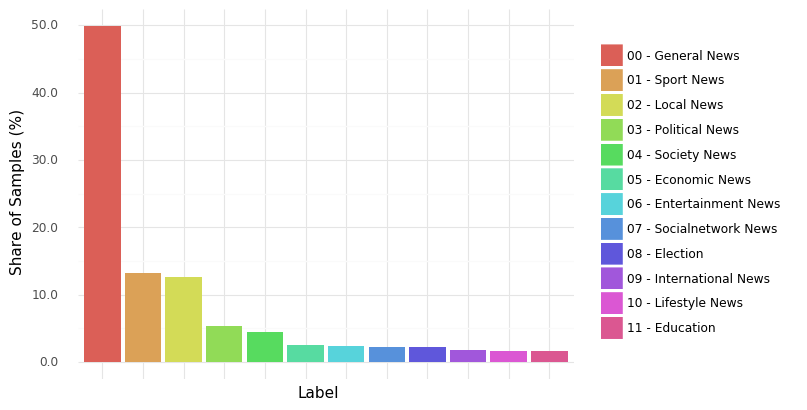

<ggplot: (7548452545)>


,label,cnt,per,en_label
0,ข่าวทั่วไป,58401,0.498804,00 - General News
1,ข่าวกีฬา,15557,0.132873,01 - Sport News
8,ข่าวทั่วไทย,14728,0.125792,02 - Local News
2,ข่าวการเมือง,6214,0.053074,03 - Political News
3,ข่าวสังคม,5191,0.044336,04 - Society News
4,ข่าวเศรษฐกิจ,3003,0.025649,05 - Economic News
6,ข่าวบันเทิง,2764,0.023607,06 - Entertainment News
5,ข่าวโซเชียล,2663,0.022745,07 - Socialnetwork News
9,เลือกตั้ง,2565,0.021908,08 - Election
7,ข่าวต่างประเทศ,2137,0.018252,09 - International News


In [17]:
g = (ggplot(label_df,aes(x='en_label', y='per', fill='en_label')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    xlab('Label') + ylab('Share of Samples (%)') + 
    theme(axis_text_x = element_blank(),legend_title=element_blank()))
print(g)
label_df

### Label Correlation

In [28]:
corr_df.columns = label_df.en_label

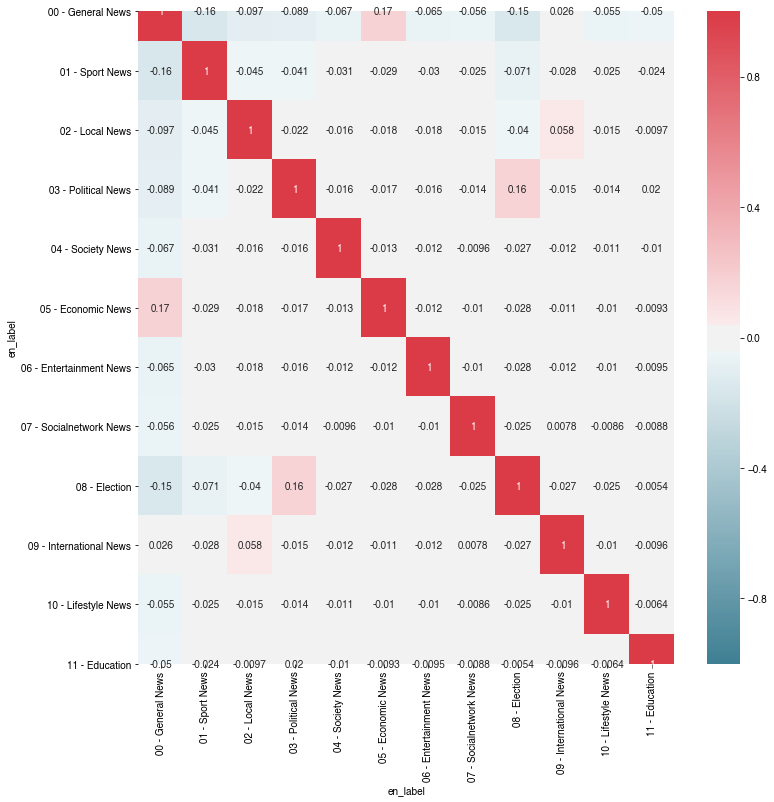

In [29]:
plt.figure(figsize=(12,12))
corr = corr_df.corr(method='pearson')
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            vmin=-1, vmax=1, annot=True)

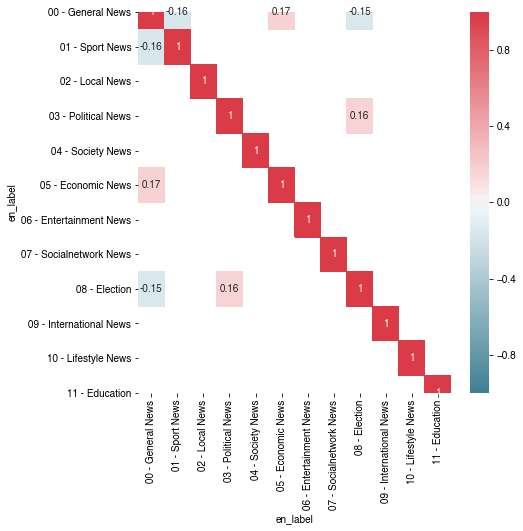

In [30]:
plt.figure(figsize=(7,7))
corr = corr_df.corr(method='pearson')
sns.heatmap(corr[(corr>0.15) | (corr<-0.15)], cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            vmin=-1, vmax=1, annot=True)

## Title

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

title_cnt = CountVectorizer(tokenizer=word_tokenize)
title_mat = title_cnt.fit_transform(thairath.title)

### Title Word Count Distribution

In [32]:
title_wc = pd.DataFrame(title_mat.sum(axis=1))
title_wc.columns = ['word_count']

Average Title Word Count: 15.73732074762926


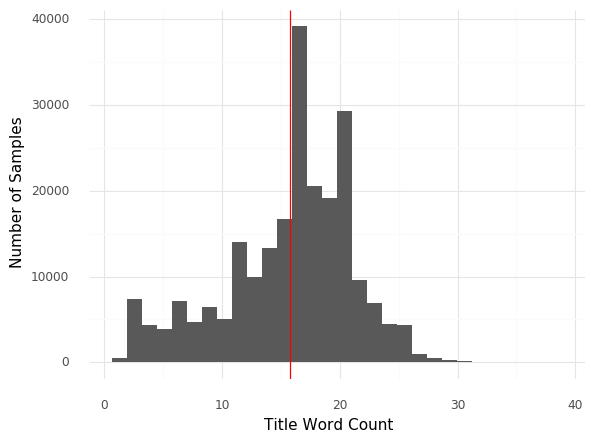

<ggplot: (7575185549)>

In [33]:
g = (ggplot(title_wc, aes(x='word_count')) + geom_histogram(bins=30) + theme_minimal() +
    xlab('Title Word Count') + ylab('Number of Samples') + 
    geom_vline(xintercept = np.mean(title_wc.word_count), color='red'))
print(f'Average Title Word Count: {np.mean(title_wc.word_count)}')
g

### Title Word Frequency

In [34]:
title_top = pd.DataFrame({
    'vocab': list(title_cnt.get_feature_names()),
    'cnt': np.asarray(title_mat.sum(axis=0)).squeeze()}).sort_values('cnt',ascending=False)
title_top = title_top.reset_index(drop=True).reset_index()

In [35]:
title_top.head()

,index,vocab,cnt
0,0,,756092
1,1,-,36994
2,2,ไม่,17679
3,3,2,16000
4,4,ที่,15190


Median Title Word Frequency: 5.0


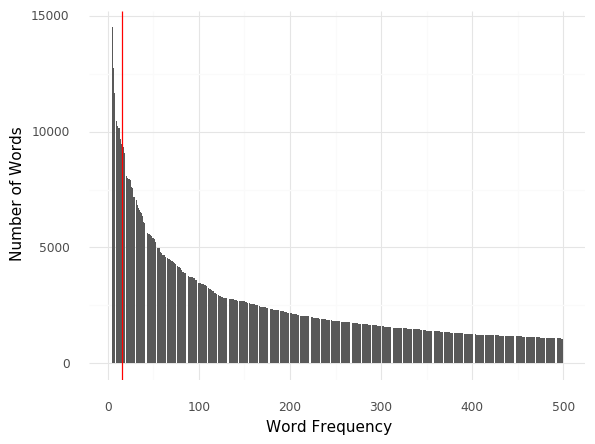

<ggplot: (7575177973)>

In [36]:
g = (ggplot(title_top.iloc[5:500,:], aes(x='index',y='cnt')) + geom_bar(stat='identity') + theme_minimal() +
    xlab('Word Frequency') + ylab('Number of Words') + 
    geom_vline(xintercept = np.mean(title_wc.word_count), color='red'))
print(f'Median Title Word Frequency: {np.median(title_top.cnt)}')
g

In [37]:
title_top.head(10)

,index,vocab,cnt
0,0,,756092
1,1,-,36994
2,2,ไม่,17679
3,3,2,16000
4,4,ที่,15190
5,5,ไทย,14496
6,6,ใน,12738
7,7,คลิป,11679
8,8,3,11636
9,9,),11469


### Text Feature Correlations

In [38]:
label_df.label

0         ข่าวทั่วไป
1           ข่าวกีฬา
8        ข่าวทั่วไทย
2       ข่าวการเมือง
3          ข่าวสังคม
4       ข่าวเศรษฐกิจ
6        ข่าวบันเทิง
5        ข่าวโซเชียล
9          เลือกตั้ง
7     ข่าวต่างประเทศ
10     ข่าวไลฟ์สไตล์
11          การศึกษา
Name: label, dtype: object

In [44]:
from class_features import *
from sklearn.feature_extraction.text import TfidfVectorizer

-- To be updated --